In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip '/content/drive/MyDrive/sgp7/Datasets.zip' -d '/content/drive/MyDrive/sgp7/'

##dependencies


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [ ]:
# reading all files

orders = pd.read_csv('/content/drive/MyDrive/sgp7/Datasets/data/orders.csv')
orders_prior = pd.read_csv('/content/drive/MyDrive/sgp7/Datasets/data/order_products__prior.csv')
orders_train = pd.read_csv('/content/drive/MyDrive/sgp7/Datasets/data/order_products__train.csv')
aisle = pd.read_csv('/content/drive/MyDrive/sgp7/Datasets/data/aisles.csv')
departments = pd.read_csv('/content/drive/MyDrive/sgp7/Datasets/data/departments.csv')
products = pd.read_csv('/content/drive/MyDrive/sgp7/Datasets/data/products.csv')

### dataset exploration

###orders_prior

In [ ]:
print(orders_prior.shape)
orders_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
print(orders_prior.order_id.nunique())
print(orders_prior.product_id.nunique())

3214874
49677


In [ ]:
orders_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


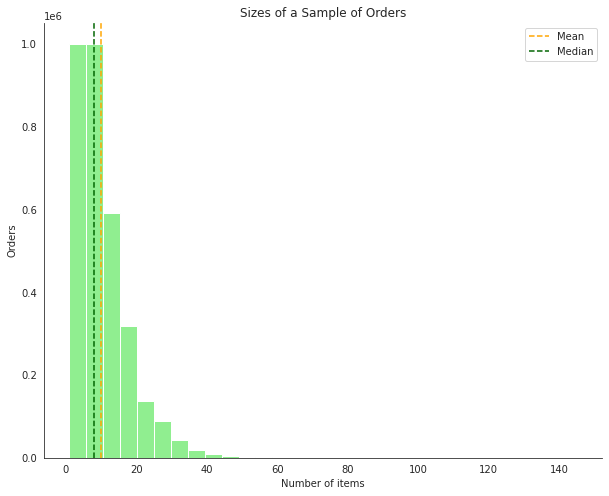

In [ ]:
# Plot histogram of products per order
plt.figure(figsize=(10,8))
plt.hist(orders_prior.order_id.value_counts(), bins=30, color='lightgreen')
plt.axvline(orders_prior.order_id.value_counts().mean(), color='orange', linestyle='dashed', label='Mean')
plt.axvline(orders_prior.order_id.value_counts().median(), color='darkgreen', linestyle='dashed', label='Median')
plt.title('Sizes of a Sample of Orders')
plt.xlabel('Number of items')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.show();

In [ ]:
order_sizes = orders_prior.groupby('order_id').agg(num_products=('product_id', 'size'))
order_sizes.head()

,num_products
order_id,
2,9
3,8
4,13
5,26
6,3


In [ ]:
len(order_sizes)

3214874

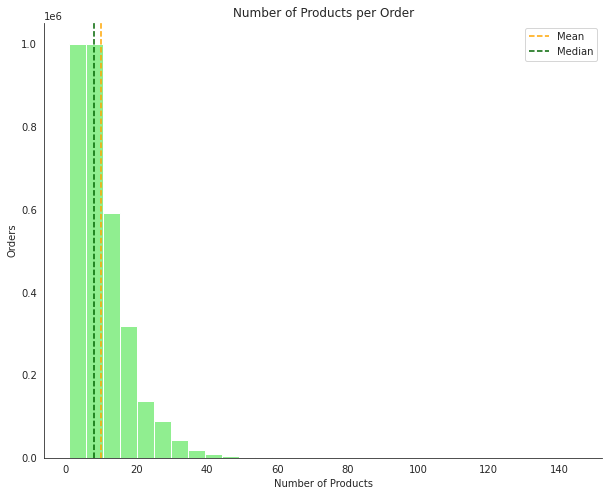

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(order_sizes.num_products, bins=30, color='lightgreen')
plt.axvline(order_sizes.num_products.mean(), color='orange', linestyle='dashed', label='Mean')
plt.axvline(order_sizes.num_products.median(), color='darkgreen', linestyle='dashed', label='Median')
plt.title('Number of Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.show();

In [ ]:
print('Mean:', order_sizes.num_products.mean())
print('Median:', order_sizes.num_products.median())

Mean: 10.088883421247614
Median: 8.0


###orders_train

In [ ]:
print(orders_train.shape)
orders_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
print(orders_train.order_id.nunique())
print(orders_train.product_id.nunique())

131209
39123


###orders

In [ ]:
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


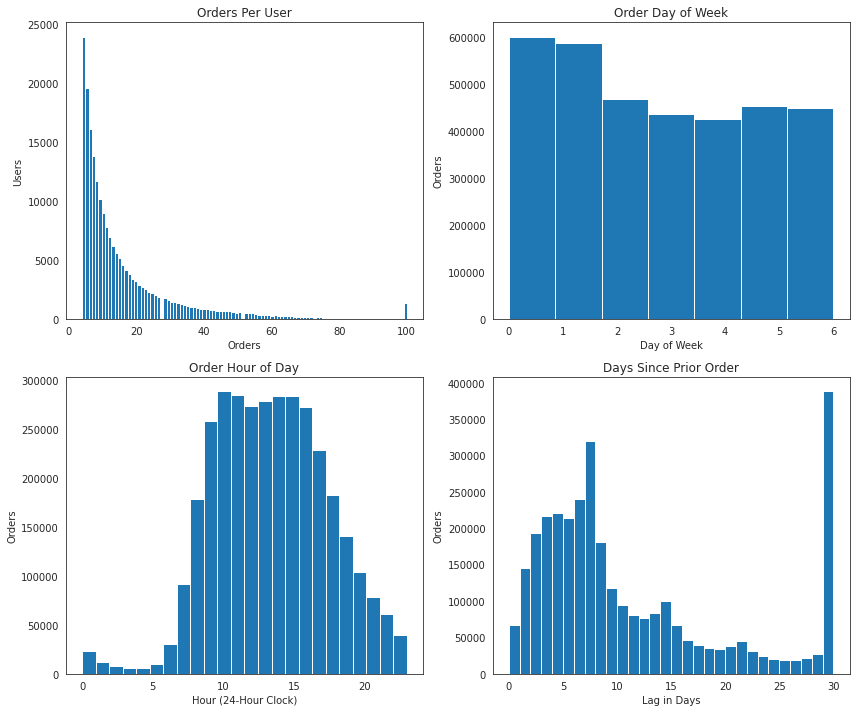

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

ax0 = axes[0,0]
ax0.hist(orders.user_id.value_counts(), bins=100)
ax0.set_title('Orders Per User')
ax0.set_xlabel('Orders')
ax0.set_ylabel('Users')

ax1 = axes[0,1]
ax1.hist(orders.order_dow, bins=7)
ax1.set_title('Order Day of Week')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Orders')

ax2 = axes[1,0]
ax2.hist(orders.order_hour_of_day, bins=24)
ax2.set_title('Order Hour of Day')
ax2.set_xlabel('Hour (24-Hour Clock)')
ax2.set_ylabel('Orders')

ax3 = axes[1,1]
ax3.hist(orders.days_since_prior_order, bins=30)
ax3.set_title('Days Since Prior Order')
ax3.set_xlabel('Lag in Days')
ax3.set_ylabel('Orders')

plt.tight_layout()
plt.show();

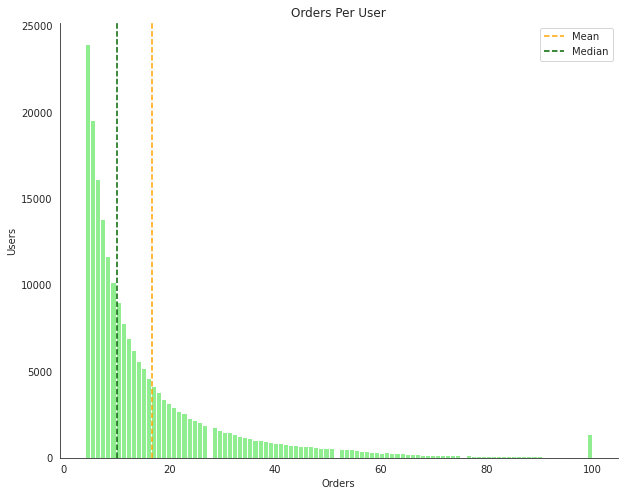

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(orders.user_id.value_counts(), bins=100, color='lightgreen')
plt.axvline(orders.user_id.value_counts().mean(), color='orange', 
            linestyle='dashed', label='Mean')
plt.axvline(orders.user_id.value_counts().median(), color='darkgreen', 
            linestyle='dashed', label='Median')
plt.title('Orders Per User')
plt.xlabel('Orders')
plt.ylabel('Users')
plt.legend()
sns.despine()
plt.show();

each user order 4-100 times and and avg numer of order per user is 17 times.

In [ ]:
print('Mean:', orders.user_id.value_counts().mean())
print('Median:', orders.user_id.value_counts().median())

Mean: 16.590367054784224
Median: 10.0


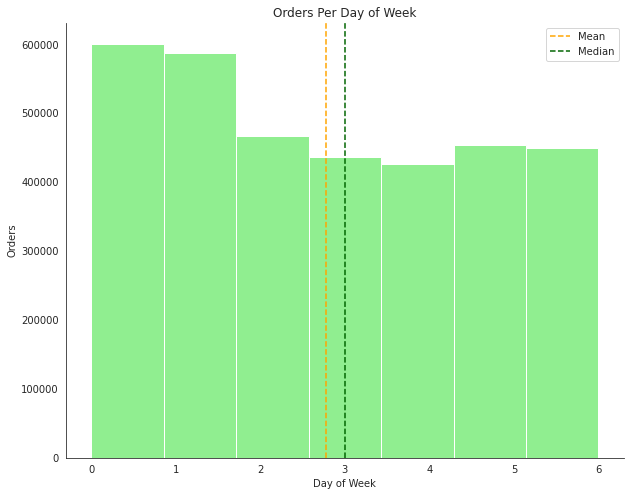

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(orders.order_dow, bins=7, color='lightgreen')
plt.axvline(orders.order_dow.mean(), color='orange', 
            linestyle='dashed', label='Mean')
plt.axvline(orders.order_dow.median(), color='darkgreen', 
            linestyle='dashed', label='Median')
plt.title('Orders Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.show();

In [ ]:
print('Mean:', orders.order_dow.mean())
print('Median:', orders.order_dow.median())

Mean: 2.7762191095626734
Median: 3.0


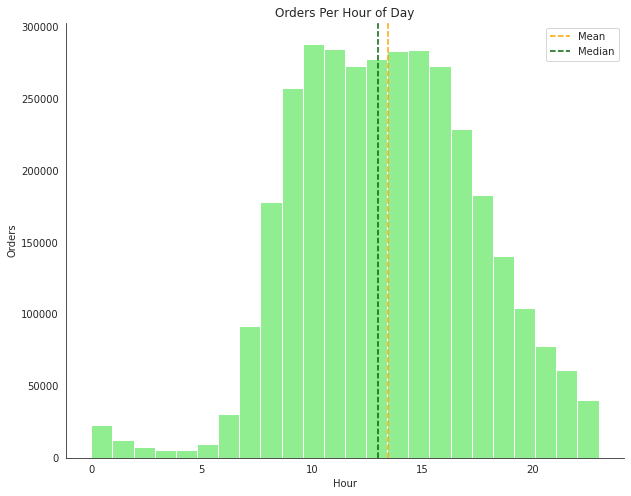

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(orders.order_hour_of_day, bins=24, color='lightgreen')
plt.axvline(orders.order_hour_of_day.mean(), color='orange', 
            linestyle='dashed', label='Mean')
plt.axvline(orders.order_hour_of_day.median(), color='darkgreen', 
            linestyle='dashed', label='Median')
plt.title('Orders Per Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.show();

In [ ]:
print('Mean:', orders.order_hour_of_day.mean())
print('Median:', orders.order_hour_of_day.median())

Mean: 13.45201534134074
Median: 13.0


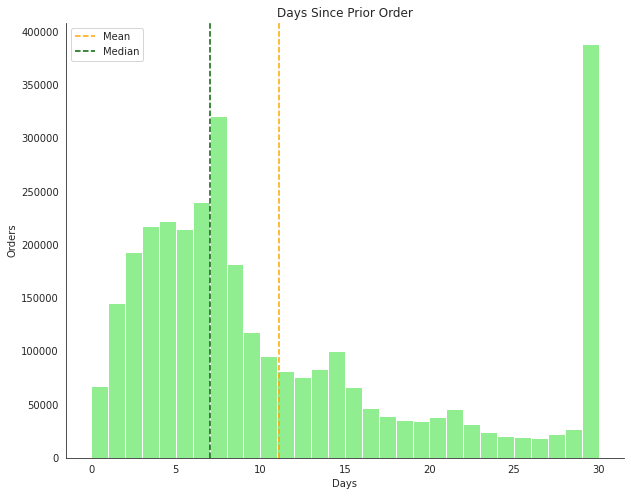

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(orders.days_since_prior_order, bins=30, color='lightgreen')
plt.axvline(orders.days_since_prior_order.mean(), color='orange', 
            linestyle='dashed', label='Mean')
plt.axvline(orders.days_since_prior_order.median(), color='darkgreen', 
            linestyle='dashed', label='Median')
plt.title('Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Orders')
plt.legend()
sns.despine()
plt.show();

it seems that people reorder in evry 7 days. also a large group of people reorder in 30 days time period.

In [ ]:
print('Mean:', orders.days_since_prior_order.mean())
print('Median:', orders.days_since_prior_order.median())

Mean: 11.114836226863012
Median: 7.0


###products

In [ ]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


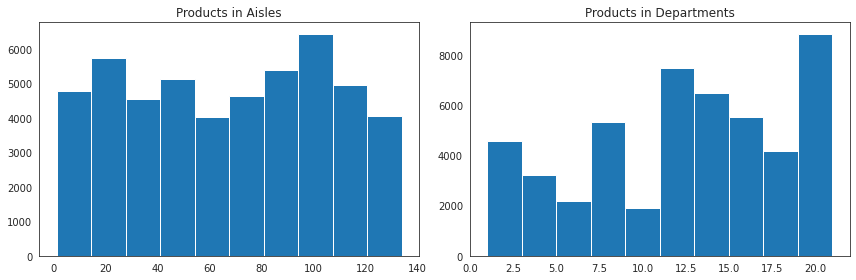

In [ ]:
# Plot histograms of counts of products per aisle, department
fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax0 = axes[0]
ax0.hist(products.aisle_id)
ax0.set_title('Products in Aisles')

ax1 = axes[1]
ax1.hist(products.department_id)
ax1.set_title('Products in Departments')

plt.tight_layout()
plt.show();

###aisel

In [ ]:
print(aisle.shape)
aisle.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
aisle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


###departments

In [ ]:
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
departments.value_counts()

department_id  department     
21             missing            1
10             bulk               1
2              other              1
3              bakery             1
4              produce            1
5              alcohol            1
6              international      1
7              beverages          1
8              pets               1
9              dry goods pasta    1
11             personal care      1
20             deli               1
12             meat seafood       1
13             pantry             1
14             breakfast          1
15             canned goods       1
16             dairy eggs         1
17             household          1
18             babies             1
19             snacks             1
1              frozen             1
dtype: int64

--------------------------------------------------------------------------------

In [ ]:
# count the total user 
print('Tortal number of unique user:',orders.user_id.nunique())

Tortal number of unique user: 206209


In [ ]:
# busiest day of week in orders
orders.order_dow.value_counts()

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

considering the 0-SUNDAY, 1-MONDAY then busiest day for orders is sunday

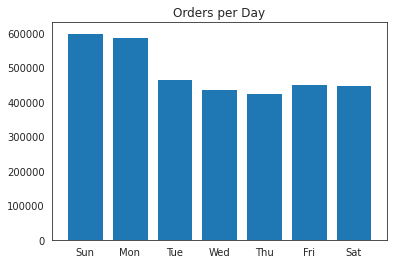

In [ ]:
days = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
values = [orders.order_dow.value_counts()[day] for day in days.keys()]
# print(values)
plt.bar(days.values(), values)
plt.title('Orders per Day')
plt.show()

Busiest hours in which orders placed for week

In [ ]:
orders.order_hour_of_day.value_counts()

10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64

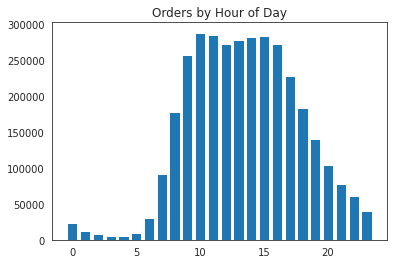

In [ ]:
# busiest hours in which orders placed foe whole week
plt.bar(orders.order_hour_of_day.value_counts().index, orders.order_hour_of_day.value_counts())
plt.title('Orders by Hour of Day')
plt.show();

we can see that between the timing 10-4 highest orders are placed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


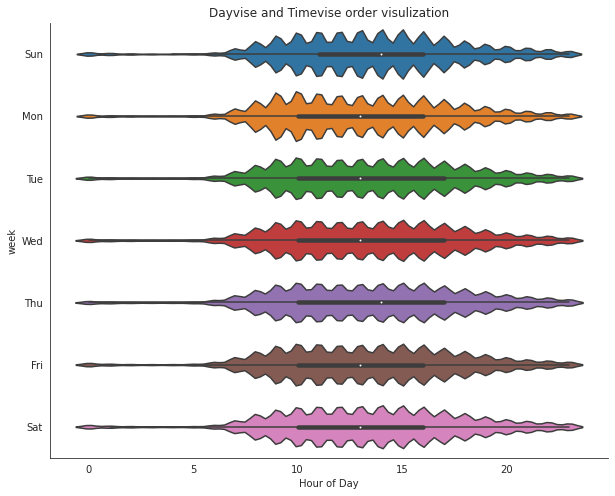

In [ ]:
# orders by hour per day
plt.figure(figsize=(10, 8))
sns.violinplot(orders.order_hour_of_day, orders.order_dow, orient='h')
plt.yticks(range(7), [days[n] for n in range(7)])
plt.xticks([0, 5, 10, 15, 20], [0, 5, 10, 15, 20])
plt.xlabel('Hour of Day')
plt.ylabel('week')
plt.title('Dayvise and Timevise order visulization')
sns.despine()
plt.show();

lets check out the department with most product 

In [ ]:
# first need to merge department data with product
prod_dept_df = pd.merge(pd.merge(left=products, right=departments), aisle, sort= True)
prod_dept_df.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,209,Italian Pasta Salad,1,20,deli,prepared soups salads
1,554,Turkey Chili,1,20,deli,prepared soups salads
2,886,Whole Grain Salad with Roasted Pecans & Mango ...,1,20,deli,prepared soups salads
3,1600,Mediterranean Orzo Salad,1,20,deli,prepared soups salads
4,2539,Original Potato Salad,1,20,deli,prepared soups salads


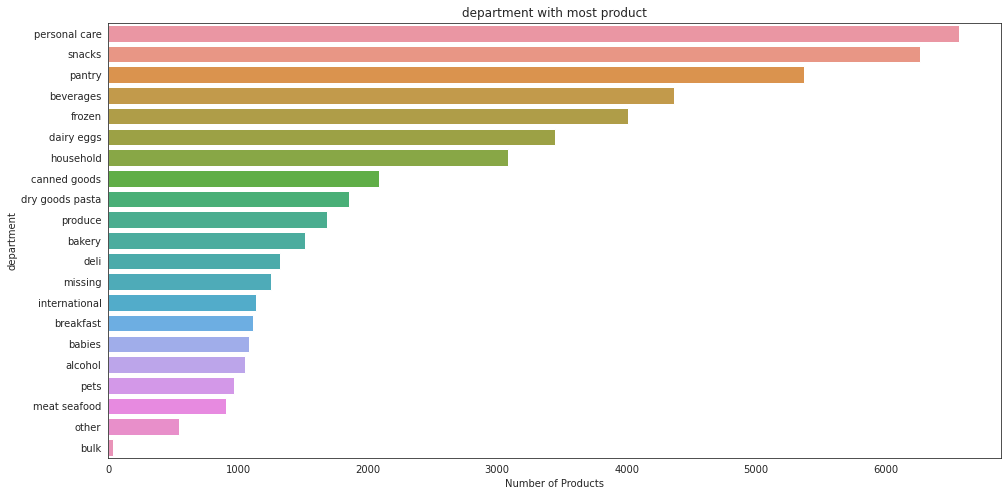

In [ ]:
plt.figure(figsize = (16, 8))
sns.countplot(y = prod_dept_df.department, order = prod_dept_df.department.value_counts().index)
plt.xlabel('Number of Products')
plt.title('department with most product')
plt.show()

lets see top 10 aisles with product

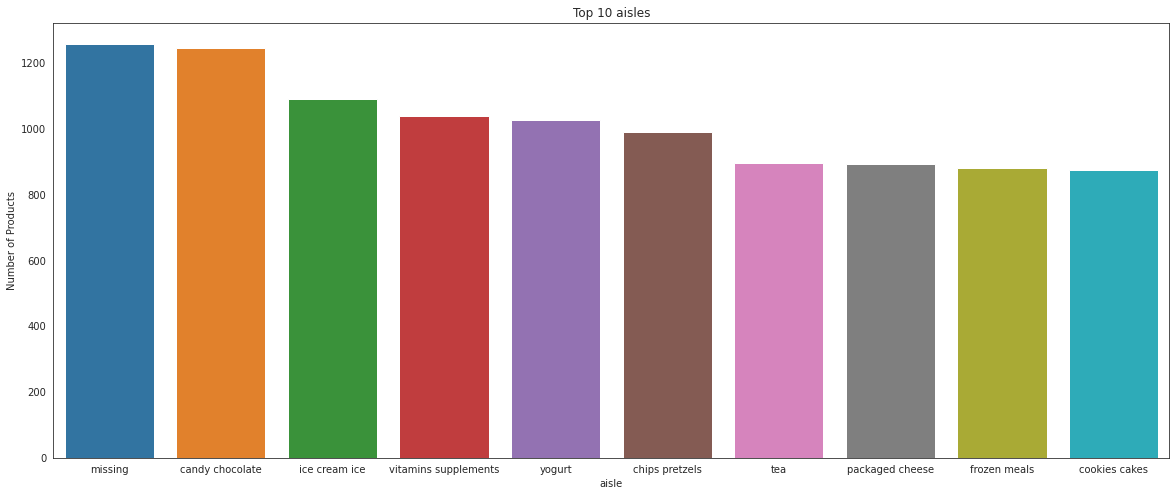

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x = prod_dept_df.aisle, order = prod_dept_df.aisle.value_counts().index[:10])
plt.ylabel('Number of Products')
plt.title('Top 10 aisles')
plt.show()

explore orders

In [ ]:
# merginf orders and orders_prior
orders_prior_df = orders[orders.eval_set == 'prior']

In [ ]:
# orders_prior.head()
print(orders_prior_df.shape)

(3214874, 7)


In [ ]:
orders_prior_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
order_prior_df = pd.merge(orders_prior, orders_prior_df)

In [ ]:
order_prior_df.set_index('order_id', inplace = True)


In [ ]:
order_prior_df.drop('eval_set',1,inplace = True)

In [ ]:
order_prior_df.head()

,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,,,
2,33120,1,1,202279,3,5,9,8.0
2,28985,2,1,202279,3,5,9,8.0
2,9327,3,0,202279,3,5,9,8.0
2,45918,4,1,202279,3,5,9,8.0
2,30035,5,0,202279,3,5,9,8.0


In [ ]:
print(order_prior_df.shape)

(32434489, 8)


###Data Preproccesing

cleaning the data

In [ ]:
order_prior_df.isna().sum()

product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

there are 2078068 NaN values in days_since_prior_order column. now we will fill this NaN vakue with mode. here it is 7.
The mode of a set of values is the value that appears most often. It can be multiple values.

In [ ]:
order_prior_df.fillna(order_prior_df['days_since_prior_order'].mode()[0],inplace = True)

now, merge the product and oreder_proir_df2

In [ ]:
order_prior_df = pd.merge(order_prior_df, prod_dept_df, on = 'product_id')

In [ ]:
order_prior_df.head()

,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
0,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
1,33120,5,0,153404,2,0,16,7.0,Organic Egg Whites,86,16,dairy eggs,eggs
2,33120,13,0,23750,11,6,8,10.0,Organic Egg Whites,86,16,dairy eggs,eggs
3,33120,5,1,58707,21,6,9,8.0,Organic Egg Whites,86,16,dairy eggs,eggs
4,33120,28,1,166654,48,0,12,9.0,Organic Egg Whites,86,16,dairy eggs,eggs


In [ ]:
order_prior_df.shape

(32434489, 13)

In [ ]:
type(order_prior_df)

pandas.core.frame.DataFrame

In [ ]:
# order_prior_df.to_csv('/content/drive/MyDrive/sgp7/order_prior.csv')

In [7]:
order_prior_df = pd.read_csv('/content/drive/MyDrive/sgp7/order_prior.csv')

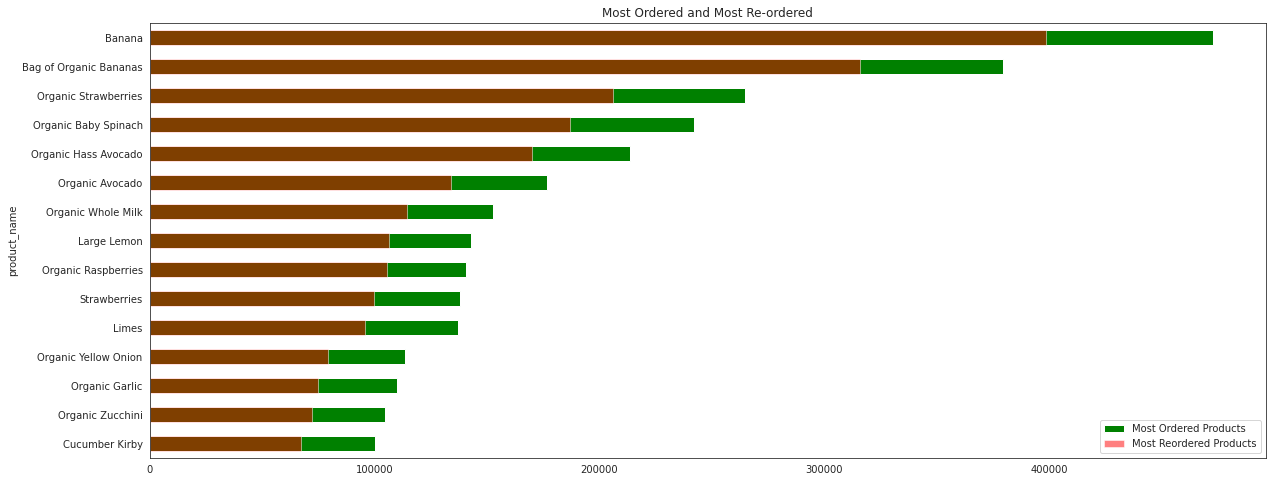

In [ ]:

order_prior_df.product_name.value_counts()[:15].sort_values(ascending = True).plot(
    kind = 'barh',
    figsize = (20,8),
    color = 'g',
    label = 'Most Ordered Products')

order_prior_df.groupby('product_name')['reordered'].sum().sort_values(ascending = False)[:15].sort_values(ascending = True).plot(
    kind = 'barh',
    figsize = (20,8), 
    color = 'r', 
    alpha = 0.5, 
    label = 'Most Reordered Products')

plt.legend()
plt.title('Most Ordered and Most Re-ordered')
plt.show()

we can see that in the top most products there is only fruits and vegies.

## clustering

now lets cluster the data.

for customer segmentation we will be using User_id and aisle to make category. as the number of department is small and a product is very huge comparably. we uses aisle for in between category based on orders.

In [ ]:
crosstable_user_aisle = pd.crosstab(order_prior_df['user_id'], order_prior_df['aisle'])

In [ ]:
# crosstable_user_aisle.to_csv('crosstable.csv')

In [8]:
crosstable_user_aisle = pd.read_csv('/content/drive/MyDrive/sgp7/crosstable.csv')

In [9]:
crosstable_user_aisle.set_index('user_id', inplace=True)

In [ ]:
# crosstable_user_aisle.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,body lotions soap,bread,breakfast bakery,breakfast bars pastries,bulk dried fruits vegetables,bulk grains rice dried goods,buns rolls,butter,candy chocolate,canned fruit applesauce,canned jarred vegetables,canned meals beans,canned meat seafood,cat food care,cereal,chips pretzels,cleaning products,cocoa drink mixes,coffee,cold flu allergy,condiments,cookies cakes,crackers,cream,deodorants,diapers wipes,digestion,dish detergents,dog food care,doughs gelatins bake mixes,...,packaged meat,packaged poultry,packaged produce,packaged seafood,packaged vegetables fruits,paper goods,pasta sauce,pickled goods olives,plates bowls cups flatware,popcorn jerky,poultry counter,prepared meals,prepared soups salads,preserved dips spreads,protein meal replacements,red wines,refrigerated,refrigerated pudding desserts,salad dressing toppings,seafood counter,shave needs,skin care,soap,soft drinks,soup broth bouillon,soy lactosefree,specialty cheeses,specialty wines champagnes,spices seasonings,spirits,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,1,0,0,12,0,0,0,0,5,0,11,0,0,0,0,0,0,0,...,0,1,0,0,3,0,0,1,0,10,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,14,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


###Dimensionality Reduction

In [10]:
# using projection based dimensionality reduction technique -t-sne

from sklearn.manifold import TSNE

In [ ]:
# tsne_aisle = TSNE(n_components = 2)
# tsne_aisle_trans = tsne_aisle.fit_transform(crosstable_user_aisle)

In [ ]:
# np.save('dimen_redu_var', tsne_aisle_trans)

In [11]:
tsne_aisle_trans = np.load('/content/drive/MyDrive/sgp7/dimen_redu_var.npy')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


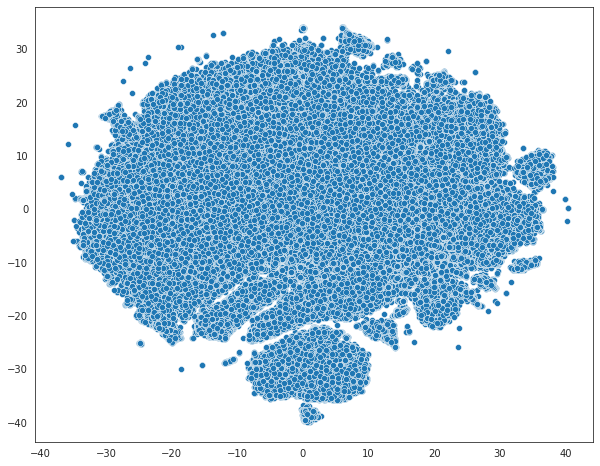

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(tsne_aisle_trans[:,0], tsne_aisle_trans[:,1])

##clustering with k-means

In [12]:
from sklearn.cluster import KMeans

In [ ]:
X = tsne_aisle_trans[:,[0,1]]

wcss =[]
for i in range(1,20):
    kmeans_tsne = KMeans(n_clusters = i, random_state = 0)
    kmeans_tsne = kmeans_tsne.fit(X)
    wcss.append(kmeans_tsne.inertia_)

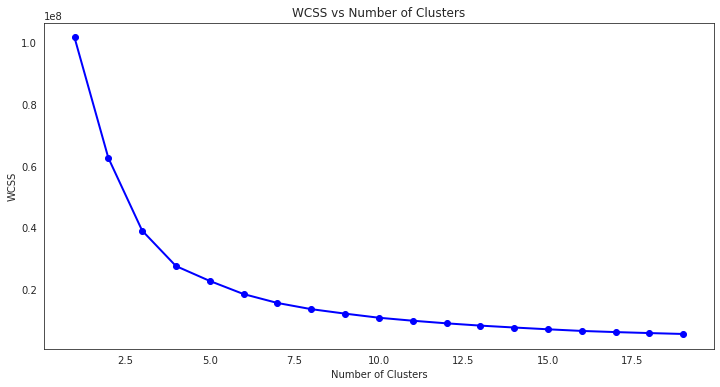

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(range(1,20), wcss, marker = 'o', lw = 2, color = 'b', markersize = 6)
plt.title('WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimal numbers of clusters K=5.

In [13]:
kmeans_aisle = KMeans(n_clusters = 5, random_state = 10)

kmeans_aisle.fit(tsne_aisle_trans[:,[0,1]])

aisle_clusters = kmeans_aisle.predict(tsne_aisle_trans[:,[0,1]])

crosstable_user_aisle['Cluster_tsne'] = aisle_clusters

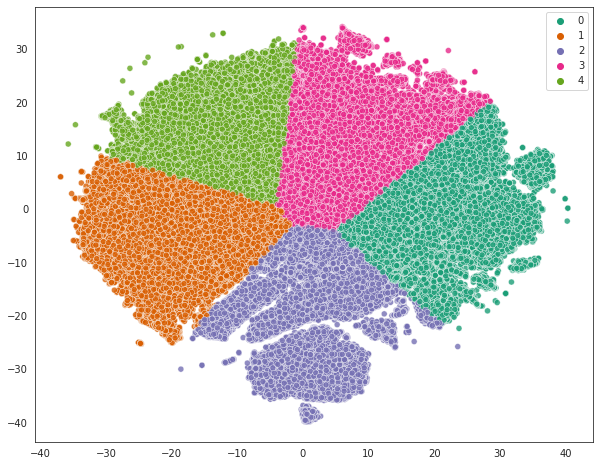

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = tsne_aisle_trans[:,0],
               y = tsne_aisle_trans[:,1], alpha = 0.8, hue = aisle_clusters, palette = 'Dark2')

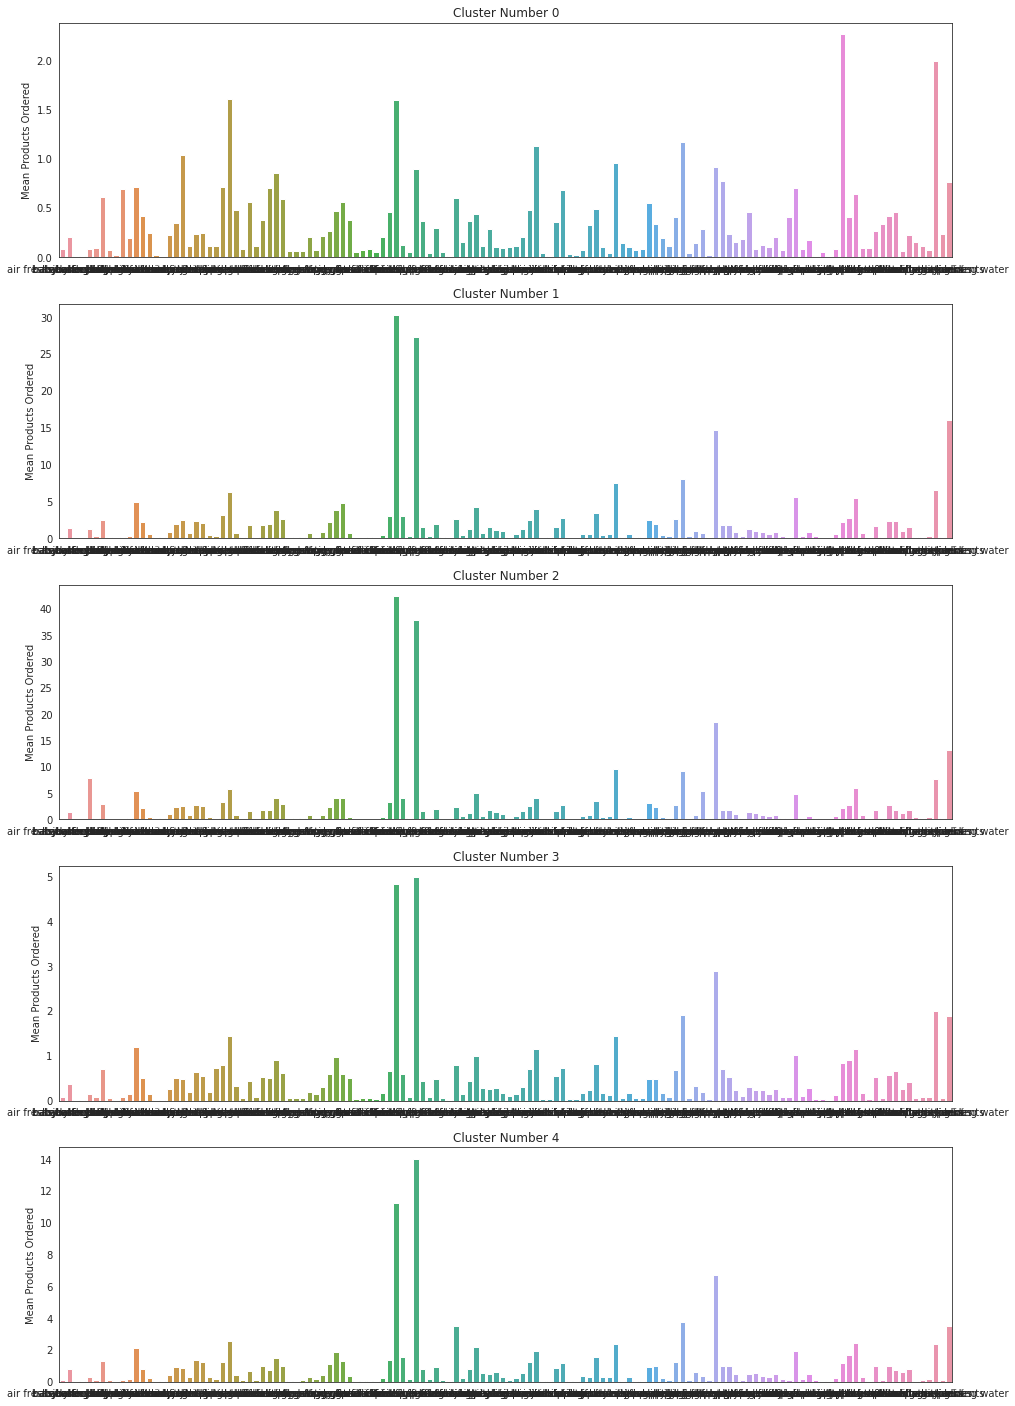

In [14]:
fig, ax = plt.subplots(5,1, figsize = (16,25))

c_no = 0
for i in range(5):
    sns.barplot(
        x = crosstable_user_aisle[crosstable_user_aisle.Cluster_tsne == c_no].iloc[:,:-1].mean().index,
        y = crosstable_user_aisle[crosstable_user_aisle.Cluster_tsne == c_no].iloc[:,:-1].mean(), 
        ax = ax[i])
    ax[i].set_ylabel('Mean Products Ordered')
    ax[i].set_title('Cluster Number {}'.format(i))
    c_no += 1
    
# plt.savefig('clusters tsne.png')

In [ ]:
aisle_c0 = order_prior_df.set_index('user_id').loc[crosstable_user_aisle[crosstable_user_aisle.Cluster_tsne == 0].index.tolist()]

In [ ]:
round(aisle_c0.aisle.value_counts(normalize = False)[:15]/len(np.unique(aisle_c0.index.values)),2)

fresh fruits                     17.66
fresh vegetables                 16.58
packaged vegetables fruits        8.56
yogurt                            7.04
packaged cheese                   4.75
milk                              4.32
water seltzer sparkling water     4.08
chips pretzels                    3.50
soy lactosefree                   3.10
bread                             2.84
refrigerated                      2.79
frozen produce                    2.53
ice cream ice                     2.42
crackers                          2.23
energy granola bars               2.21
Name: aisle, dtype: float64

In [ ]:
aisle_c1 = order_prior_df.set_index('user_id').loc[crosstable_user_aisle[crosstable_user_aisle.Cluster_tsne == 1].index.tolist()]

In [ ]:
# aisle_c1.to_csv('/content/drive/MyDrive/sgp7/cluster1.csv')

In [ ]:
round(aisle_c1.aisle.value_counts(normalize = False)[:15]/len(np.unique(aisle_c1.index.values)),2)

fresh fruits                     30.27
fresh vegetables                 27.30
yogurt                           16.08
packaged vegetables fruits       14.74
packaged cheese                   8.06
milk                              7.53
water seltzer sparkling water     6.61
chips pretzels                    6.29
refrigerated                      5.56
soy lactosefree                   5.49
bread                             4.87
energy granola bars               4.72
frozen produce                    4.31
ice cream ice                     3.94
crackers                          3.82
Name: aisle, dtype: float64

In [10]:
aisle_c2 = order_prior_df.set_index('user_id').loc[crosstable_user_aisle[crosstable_user_aisle.Cluster_tsne == 2].index.tolist()]

In [11]:
# aisle_c2.to_csv('/content/drive/MyDrive/sgp7/cluster2.csv')

In [12]:
round(aisle_c2.aisle.value_counts(normalize = False)[:15]/len(np.unique(aisle_c2.index.values)),2)

fresh fruits                     42.39
fresh vegetables                 37.89
packaged vegetables fruits       18.46
yogurt                           13.21
milk                              9.67
packaged cheese                   9.28
baby food formula                 7.97
water seltzer sparkling water     7.62
soy lactosefree                   6.03
chips pretzels                    5.80
bread                             5.46
packaged produce                  5.44
frozen produce                    4.96
refrigerated                      4.91
crackers                          4.16
Name: aisle, dtype: float64

In [13]:
aisle_c3 = order_prior_df.set_index('user_id').loc[crosstable_user_aisle[crosstable_user_aisle.Cluster_tsne == 3].index.tolist()]

In [14]:
# aisle_c3.to_csv('/content/drive/MyDrive/sgp7/cluster3.csv')

In [15]:
round(aisle_c3.aisle.value_counts(normalize = False)[:15]/len(np.unique(aisle_c3.index.values)),2)

fresh vegetables                 4.98
fresh fruits                     4.83
packaged vegetables fruits       2.90
water seltzer sparkling water    2.00
packaged cheese                  1.91
yogurt                           1.90
milk                             1.44
chips pretzels                   1.44
bread                            1.19
soy lactosefree                  1.15
ice cream ice                    1.15
refrigerated                     1.01
frozen produce                   1.00
eggs                             0.98
soup broth bouillon              0.91
Name: aisle, dtype: float64

In [10]:
aisle_c4 = order_prior_df.set_index('user_id').loc[crosstable_user_aisle[crosstable_user_aisle.Cluster_tsne == 4].index.tolist()]

In [11]:
# aisle_c4.to_csv('/content/drive/MyDrive/sgp7/cluster4.csv')

In [12]:
round(aisle_c4.aisle.value_counts(normalize = False)[:15]/len(np.unique(aisle_c4.index.values)),2)

fresh vegetables                 14.03
fresh fruits                     11.25
packaged vegetables fruits        6.71
packaged cheese                   3.73
yogurt                            3.51
frozen meals                      3.50
chips pretzels                    2.55
soy lactosefree                   2.42
water seltzer sparkling water     2.36
milk                              2.35
frozen produce                    2.22
bread                             2.15
ice cream ice                     1.91
refrigerated                      1.91
eggs                              1.90
Name: aisle, dtype: float64

In [16]:
# percentage of users in each segment
np.round(crosstable_user_aisle['Cluster_tsne'].value_counts(normalize = True).sort_index()*100,5)

0    20.49038
1    21.06213
2    18.64953
3    22.17362
4    17.62435
Name: Cluster_tsne, dtype: float64